In [43]:
import numpy as np
import matplotlib.pyplot as plt

def my_read_bin(cur_inp_file, data_type, input_shape):
    A = np.fromfile(cur_inp_file, dtype = data_type)
    A[np.isnan(A)] = 0
    A = np.reshape(A, input_shape)
    A = np.transpose(A, [2, 1, 0, 3])
    return A

def normalization_to255(SA_rec):
    
    nm_img = (SA_rec-np.min(SA_rec))/(np.max(SA_rec)-np.min(SA_rec))*255
    
    return nm_img

#cur_X = my_read_bin(cur_inp_file, 'float32', input_shape_orig)


In [49]:
base_folder='/data01/user-storage/y.zezhang/2024_subsample_project/mod_SA_images'
sparse_view_level=15
lambda_setting=7

sparse_view_location=f'{base_folder}/{sparse_view_level}'
full_view_location=f'{base_folder}/30'
MSE_location=f'{base_folder}/d{sparse_view_level}_lmbdchdiff0_nn'
Method_location=f'{base_folder}/d{sparse_view_level}_lmbdchdiff{lambda_setting}_nn'

In [50]:
patient_id='72628005'
defect_setting='diseased'
defect_type='di2130s250'

sparse_view_img_loc=f'{sparse_view_location}/{defect_setting}/{patient_id}/CTAC/{defect_type}/reoriented_windowed.img'
full_view_img_loc=f'{full_view_location}/{defect_setting}/{patient_id}/CTAC/{defect_type}/reoriented_windowed.img'
MSE_img_loc=f'{MSE_location}/{defect_setting}/{patient_id}/CTAC/{defect_type}/extended_reoriented_windowed.img'
Method_img_loc=f'{Method_location}/{defect_setting}/{patient_id}/CTAC/{defect_type}/extended_reoriented_windowed.img'

Nx_in, Ny_in, Nz_in = 48, 48, 48
num_input_channels = 1
input_shape_orig = (Nz_in, Ny_in, Nx_in, num_input_channels)

#SA_rec = (SA_rec-np.min(SA_rec))/(np.max(SA_rec)-np.min(SA_rec))*255

sparse_view_img = my_read_bin(sparse_view_img_loc, 'float32', input_shape_orig)
sparse_view_img=normalization_to255(sparse_view_img)

full_view_img = my_read_bin(full_view_img_loc, 'float32', input_shape_orig)
full_view_img=normalization_to255(full_view_img)

MSE_img = my_read_bin(MSE_img_loc, 'float32', input_shape_orig)
MSE_img=normalization_to255(MSE_img)

Method_img = my_read_bin(Method_img_loc, 'float32', input_shape_orig)
Method_img = normalization_to255(Method_img)


In [51]:
sparse_view_img_slice = sparse_view_img[:,:,24]
frequency_domain_sparse_view_img_slice = np.fft.fft2(sparse_view_img_slice)
# Shift the zero frequency component to the center
frequency_domain_sparse_view_img_slice_shifted = np.fft.fftshift(frequency_domain_sparse_view_img_slice)

full_view_img_slice = full_view_img[:,:,24]
frequency_domain_full_view_img_slice = np.fft.fft2(full_view_img_slice)
# Shift the zero frequency component to the center
frequency_domain_full_view_img_slice_shifted = np.fft.fftshift(frequency_domain_full_view_img_slice)


MSE_img_slice = MSE_img[:,:,24]
frequency_domain_MSE_img_slice = np.fft.fft2(MSE_img_slice)
# Shift the zero frequency component to the center
frequency_domain_MSE_img_slice_shifted = np.fft.fftshift(frequency_domain_MSE_img_slice)


Method_img_slice = Method_img[:,:,24]
frequency_domain_Method_img_slice = np.fft.fft2(Method_img_slice)
# Shift the zero frequency component to the center
frequency_domain_Method_img_slice_shifted = np.fft.fftshift(frequency_domain_Method_img_slice)



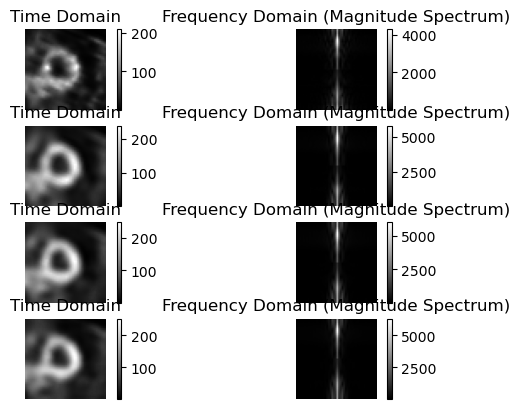

In [52]:
# Plot the time domain matrix
#plt.figure(figsize=(16, 6))
plt.figure()

plt.subplot(421)
plt.title('Time Domain')
plt.axis('off')
plt.imshow(sparse_view_img_slice, cmap='gray')
plt.colorbar()

# Plot the magnitude spectrum of the frequency domain matrix
plt.subplot(422)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.axis('off')
plt.imshow(np.abs(frequency_domain_sparse_view_img_slice_shifted), cmap='gray')
plt.colorbar()

plt.subplot(423)
plt.title('Time Domain')
plt.axis('off')
plt.imshow(full_view_img_slice, cmap='gray')
plt.colorbar()

# Plot the magnitude spectrum of the frequency domain matrix
plt.subplot(424)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.axis('off')
plt.imshow(np.abs(frequency_domain_full_view_img_slice_shifted), cmap='gray')
plt.colorbar()

plt.subplot(425)
plt.title('Time Domain')
plt.axis('off')
plt.imshow(MSE_img_slice, cmap='gray')
plt.colorbar()

# Plot the magnitude spectrum of the frequency domain matrix
plt.subplot(426)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.axis('off')
plt.imshow(np.abs(frequency_domain_MSE_img_slice_shifted), cmap='gray')
plt.colorbar()

plt.subplot(427)
plt.title('Time Domain')
plt.axis('off')
plt.imshow(Method_img_slice, cmap='gray')
plt.colorbar()

# Plot the magnitude spectrum of the frequency domain matrix
plt.subplot(428)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.axis('off')
plt.imshow(np.abs(frequency_domain_Method_img_slice_shifted), cmap='gray')
plt.colorbar()


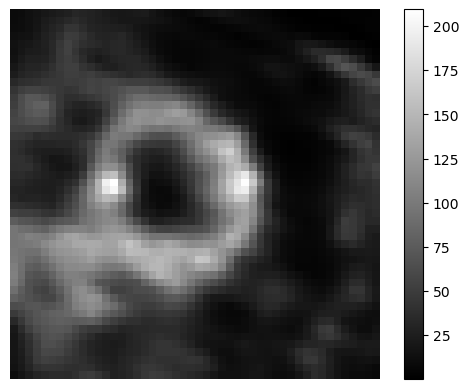

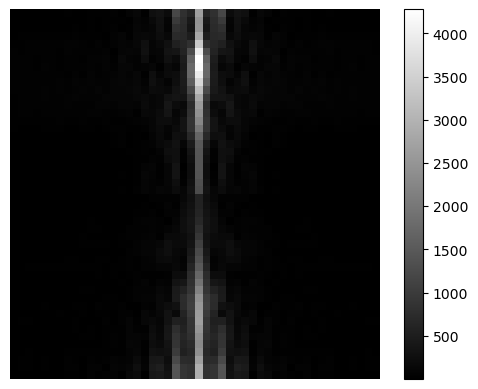

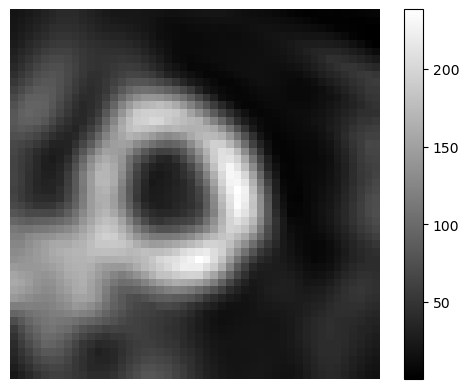

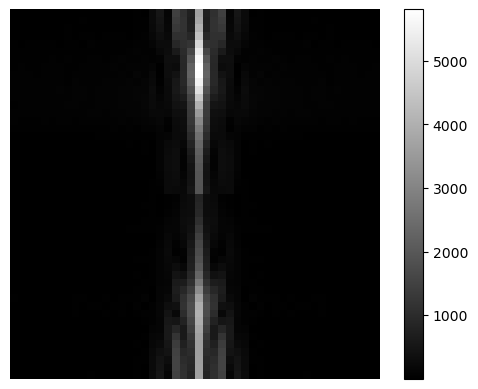

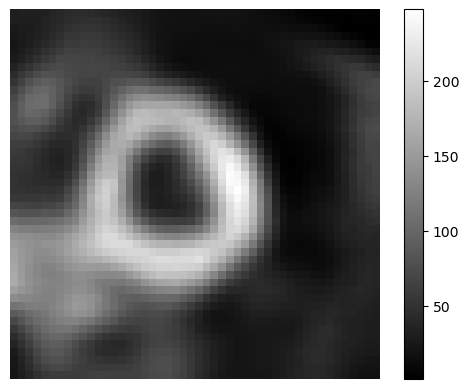

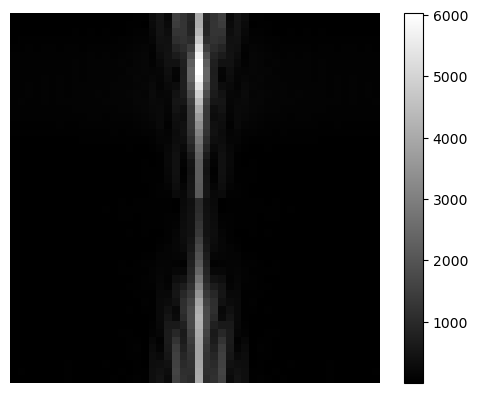

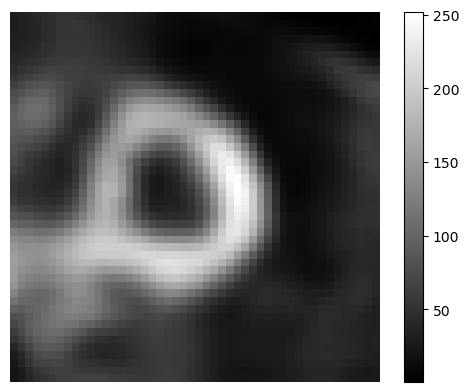

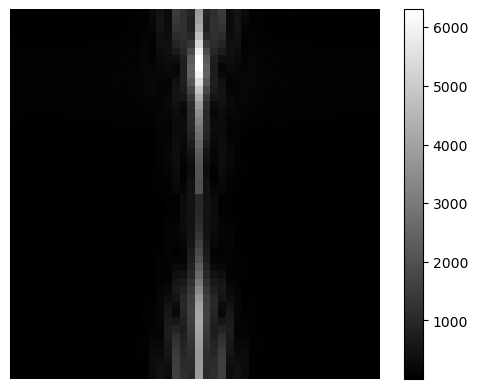

In [53]:
# Save each subplot separately
# Subplot sparse_view_img_slice
fig1 = plt.figure()
plt.imshow(sparse_view_img_slice, cmap='gray')
#plt.title('Matrix 1')
plt.colorbar()
plt.axis('off')
fig1.savefig('sparse_view_img_slice.png', bbox_inches='tight')

# Subplot 2
fig2 = plt.figure()
plt.imshow(np.abs(frequency_domain_sparse_view_img_slice_shifted), cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig2.savefig('frequency_domain_sparse_view_img_slice_shifted.png', bbox_inches='tight')

# Subplot 3
fig3 = plt.figure()
plt.imshow(full_view_img_slice, cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig3.savefig('full_view_img_slice.png', bbox_inches='tight')

# Subplot 4
fig4 = plt.figure()
plt.imshow(np.abs(frequency_domain_full_view_img_slice_shifted), cmap='gray')
#plt.title('Matrix 1')
plt.colorbar()
plt.axis('off')
fig4.savefig('frequency_domain_full_view_img_slice_shifted.png', bbox_inches='tight')

# Subplot 5
fig5 = plt.figure()
plt.imshow(MSE_img_slice, cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig5.savefig('MSE_img_slice.png', bbox_inches='tight')

# Subplot 6
fig6 = plt.figure()
plt.imshow(np.abs(frequency_domain_MSE_img_slice_shifted), cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig6.savefig('frequency_domain_MSE_img_slice_shifted.png', bbox_inches='tight')

# Subplot 7
fig7 = plt.figure()
plt.imshow(Method_img_slice, cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig7.savefig('Method_img_slice.png', bbox_inches='tight')

# Subplot 8
fig8 = plt.figure()
plt.imshow(np.abs(frequency_domain_Method_img_slice_shifted), cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig8.savefig('frequency_domain_Method_img_slice_shifted.png', bbox_inches='tight')



In [71]:

npy_location="/data01/user-storage/y.zezhang/2024_subsample_project/mod_Neural_network_training/learning/subsample_3d_v2s/SNR"

nn_version='2s'
sparse_view_level=15
location='i'
extent=30
serverity=250

sparse_view_f_loc=f'{npy_location}/d{sparse_view_level}/delta_f_bar_d{sparse_view_level}_location{location}_extent{extent}_severity{serverity}.npy'
full_view_f_loc=f'{npy_location}/d30/delta_f_bar_d30_location{location}_extent{extent}_severity{serverity}.npy'
MSE_f_loc=f'{npy_location}/NN_lmbd_mdiff0/d{sparse_view_level}/delta_f_bar_{nn_version}_d{sparse_view_level}_location{location}_extent{extent}_severity{serverity}.npy'
method_f_loc=f'{npy_location}/NN_lmbd_mdiff7/d{sparse_view_level}/delta_f_bar_{nn_version}_d{sparse_view_level}_location{location}_extent{extent}_severity{serverity}.npy'

sparse_view_f=np.load(sparse_view_f_loc)
sparse_view_f=np.reshape(sparse_view_f,(64,64))[16:48,16:48]
full_view_f=np.load(full_view_f_loc)
full_view_f=np.reshape(full_view_f,(64,64))[16:48,16:48]
MSE_f=np.load(MSE_f_loc)
MSE_f=np.reshape(MSE_f,(64,64))[16:48,16:48]
method_f=np.load(method_f_loc)
method_f=np.reshape(method_f,(64,64))[16:48,16:48]

frequency_domain_sparse_view_f = np.fft.fft2(sparse_view_f)
# Shift the zero frequency component to the center
frequency_domain_sparse_view_f_slice_shifted = np.fft.fftshift(frequency_domain_sparse_view_f)


frequency_domain_full_view_f = np.fft.fft2(full_view_f)
# Shift the zero frequency component to the center
frequency_domain_full_view_f_shifted = np.fft.fftshift(frequency_domain_full_view_f)



frequency_domain_MSE_f = np.fft.fft2(MSE_f)
# Shift the zero frequency component to the center
frequency_domain_MSE_f_shifted = np.fft.fftshift(frequency_domain_MSE_f)



frequency_domain_method_f = np.fft.fft2(method_f)
# Shift the zero frequency component to the center
frequency_domain_method_f_shifted = np.fft.fftshift(frequency_domain_method_f)


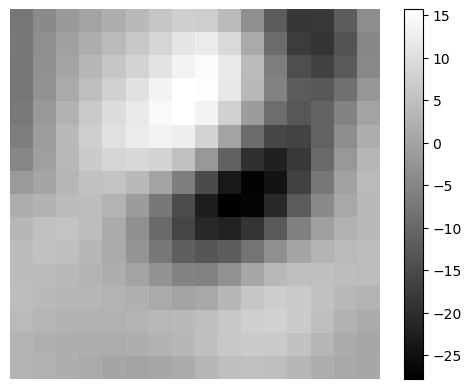

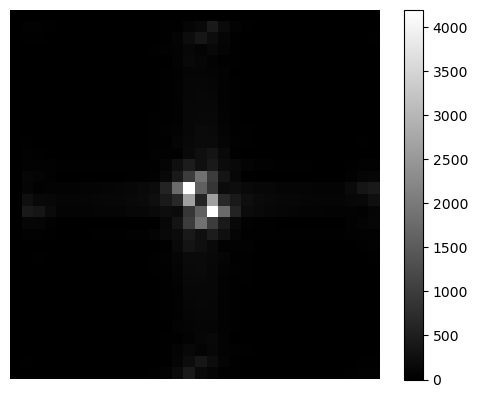

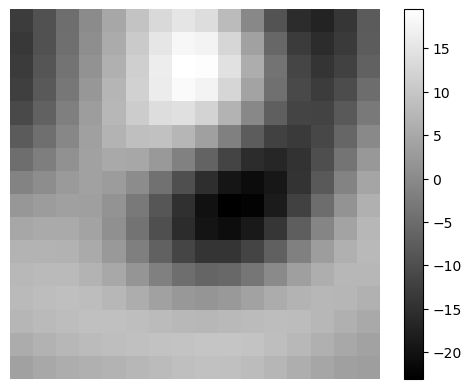

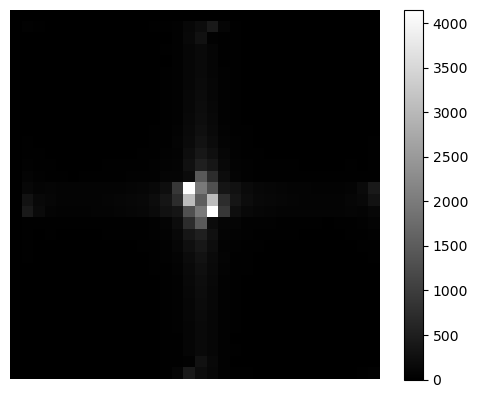

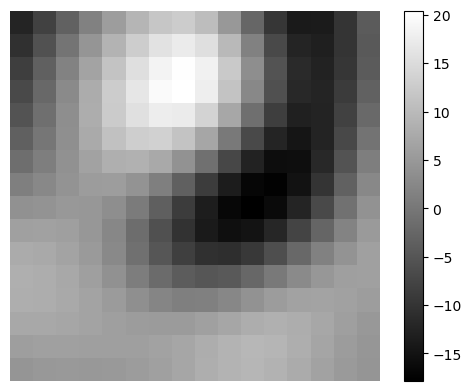

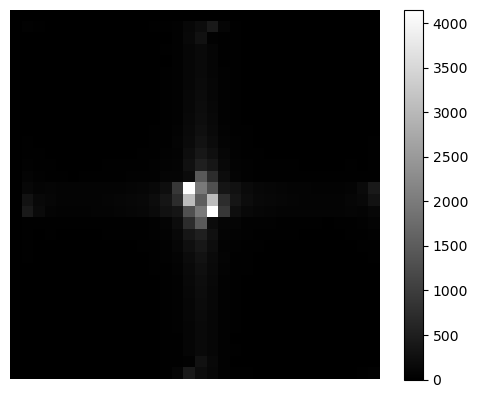

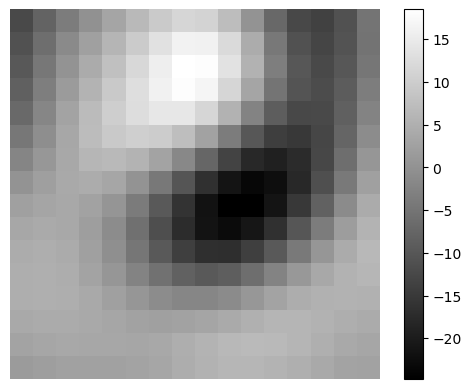

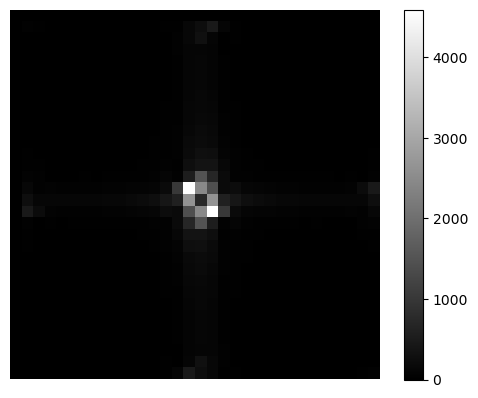

In [72]:
# Save each subplot separately
# Subplot sparse_view_img_slice

fig1 = plt.figure()
plt.imshow(sparse_view_f, cmap='gray')
#plt.title('Matrix 1')
plt.colorbar()
plt.axis('off')
fig1.savefig('sparse_view_f.png', bbox_inches='tight')

# Subplot 2
fig2 = plt.figure()
plt.imshow(np.abs(frequency_domain_sparse_view_f_slice_shifted), cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig2.savefig('frequency_domain_sparse_view_f_shifted.png', bbox_inches='tight')

# Subplot 3
fig3 = plt.figure()
plt.imshow(full_view_f, cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig3.savefig('full_view_f.png', bbox_inches='tight')

# Subplot 4
fig4 = plt.figure()
plt.imshow(np.abs(frequency_domain_MSE_f_shifted), cmap='gray')
#plt.title('Matrix 1')
plt.colorbar()
plt.axis('off')
fig4.savefig('frequency_domain_full_view_f_shifted.png', bbox_inches='tight')

# Subplot 5
fig5 = plt.figure()
plt.imshow(MSE_f, cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig5.savefig('MSE_f.png', bbox_inches='tight')

# Subplot 6
fig6 = plt.figure()
plt.imshow(np.abs(frequency_domain_MSE_f_shifted), cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig6.savefig('frequency_domain_MSE_f_shifted.png', bbox_inches='tight')

# Subplot 7
fig7 = plt.figure()
plt.imshow(method_f, cmap='gray')
#plt.title('Matrix 2')
plt.colorbar()
plt.axis('off')
fig7.savefig('method_f.png', bbox_inches='tight')

# Subplot 8
fig8 = plt.figure()
plt.imshow(np.abs(frequency_domain_method_f_shifted), cmap='gray')
#plt.title('Matrix 3')
plt.colorbar()
plt.axis('off')
fig8.savefig('frequency_domain_method_f_shifted.png', bbox_inches='tight')